# Visualize asteR1 time series

In [1]:
import numpy as np
import xarray as xr
import xmitgcm
import ecco_v4_py as ecco

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

# for visualization
import cmocean.cm as cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [2]:
scr2Dir = '/scratch2/ivana'

asteR1=f'{scr2Dir}/data/aste270/aste_THETA-SALT-SIarea_2016.nc'
ds = xr.open_dataset(asteR1)

In [3]:
display(ds)

<xarray.Dataset>
Dimensions:    (face: 6, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_u: 50,
                k_l: 50, k_p1: 51, time: 12)
Coordinates: (12/47)
  * face       (face) int64 0 1 2 3 4 5
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    maskInS    (face, j_g, i) float64 ...
    maskInW    (face, j, i_g) float64 ...
    maskS      (k, face, j_g, i) float64 ...
    maskW      (k, face, j, i_g) float64 ...
    Zl         (k_l) float64 ...
    Zu         (k_u) float64 ...
Data variables:
    THETA      (time, k, face, j, i) float32 ...
    SALT       (time, k, face, j, i) float32 ...
    SIarea     (time, face, j, i) float32 ...

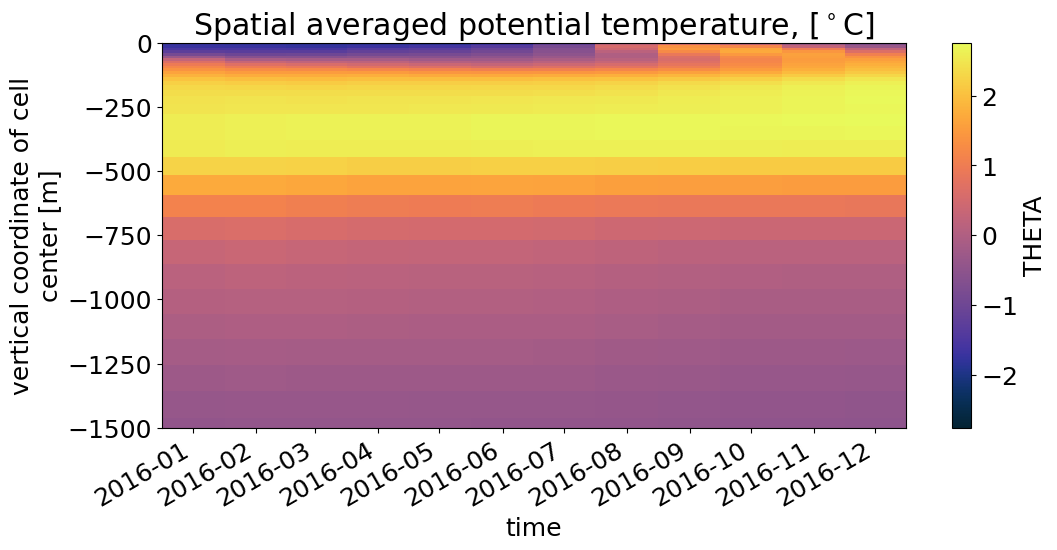

In [4]:
plt.rcParams.update({'font.size':18, 'figure.figsize':(12,5)})

plt.figure()
ds70 = ds.THETA.isel(face=2, i=70, j=slice(50,150))
ds70.mean(dim=['j']).plot(\
    x='time',y='Z',ylim=[-1500, 0], cmap=cm.thermal)
plt.title('Spatial averaged potential temperature, [$^\circ$C]')
plt.savefig('aster1_face2_i70_j50-150_theta_time-series.png', bbox_inches='tight', transparent=True)

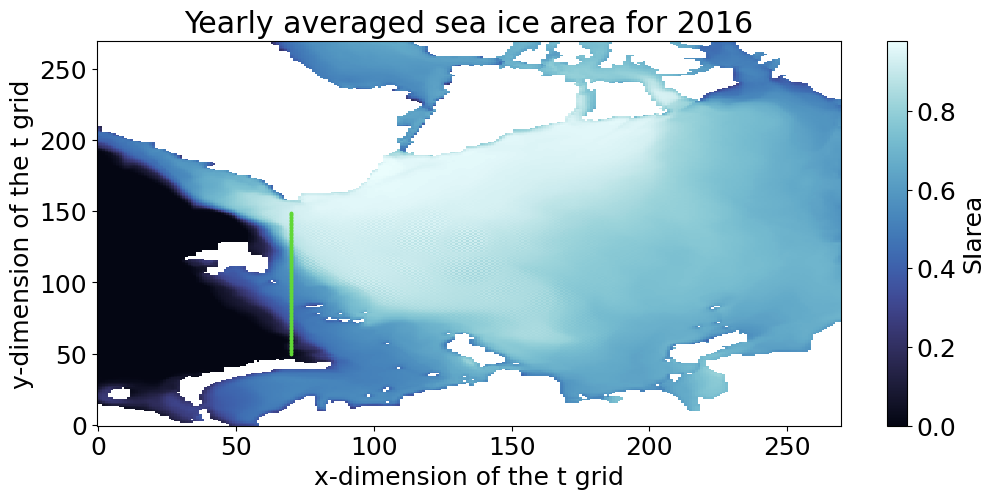

In [5]:
fig = plt.figure()

SIareamean = ds.SIarea.isel(face=2).mean('time')
SIareamean.plot(cmap=cm.ice)
plt.title('Yearly averaged sea ice area for 2016')

for jj in zip(ds70.j):
    plt.scatter(ds70.i,jj, s=3, c='#61D836')
plt.savefig('aster1_face2_siarea.png', bbox_inches='tight', transparent=True)

<sub> Written by Escobar, I. August 2023 </sub>